*Decison Tree Algorithm using Diabetes Dataset*

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Class/Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=True)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.7012987012987013

In [13]:
confusion_matrix(y_test,y_pred)

array([[36, 12],
       [11, 18]])

In [14]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.75      0.76        48\n           1       0.60      0.62      0.61        29\n\n    accuracy                           0.70        77\n   macro avg       0.68      0.69      0.68        77\nweighted avg       0.70      0.70      0.70        77\n'

[Text(0.4213662790697674, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.93\nsamples = 691\nvalue = [452.0, 239.0]'),
 Text(0.12877906976744186, 0.9, 'x[5] <= 26.45\nentropy = 0.704\nsamples = 434\nvalue = [351, 83]'),
 Text(0.2750726744186046, 0.9333333333333333, 'True  '),
 Text(0.037209302325581395, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.171\nsamples = 118\nvalue = [115, 3]'),
 Text(0.018604651162790697, 0.7666666666666667, 'x[7] <= 28.0\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.009302325581395349, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.027906976744186046, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05581395348837209, 0.7666666666666667, 'x[6] <= 0.669\nentropy = 0.074\nsamples = 111\nvalue = [110, 1]'),
 Text(0.046511627906976744, 0.7, 'entropy = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.06511627906976744, 0.7, 'x[6] <= 0.705\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(0.05581395348837209, 0.633333333333333

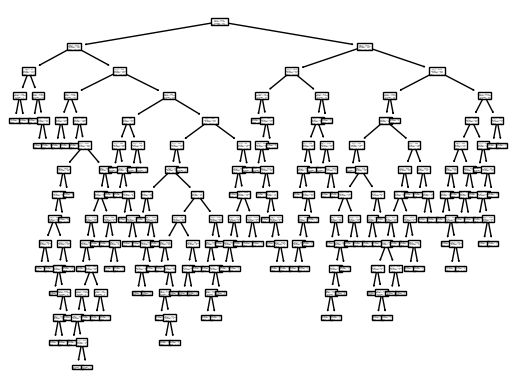

In [16]:
from sklearn import tree
tree.plot_tree(dc)

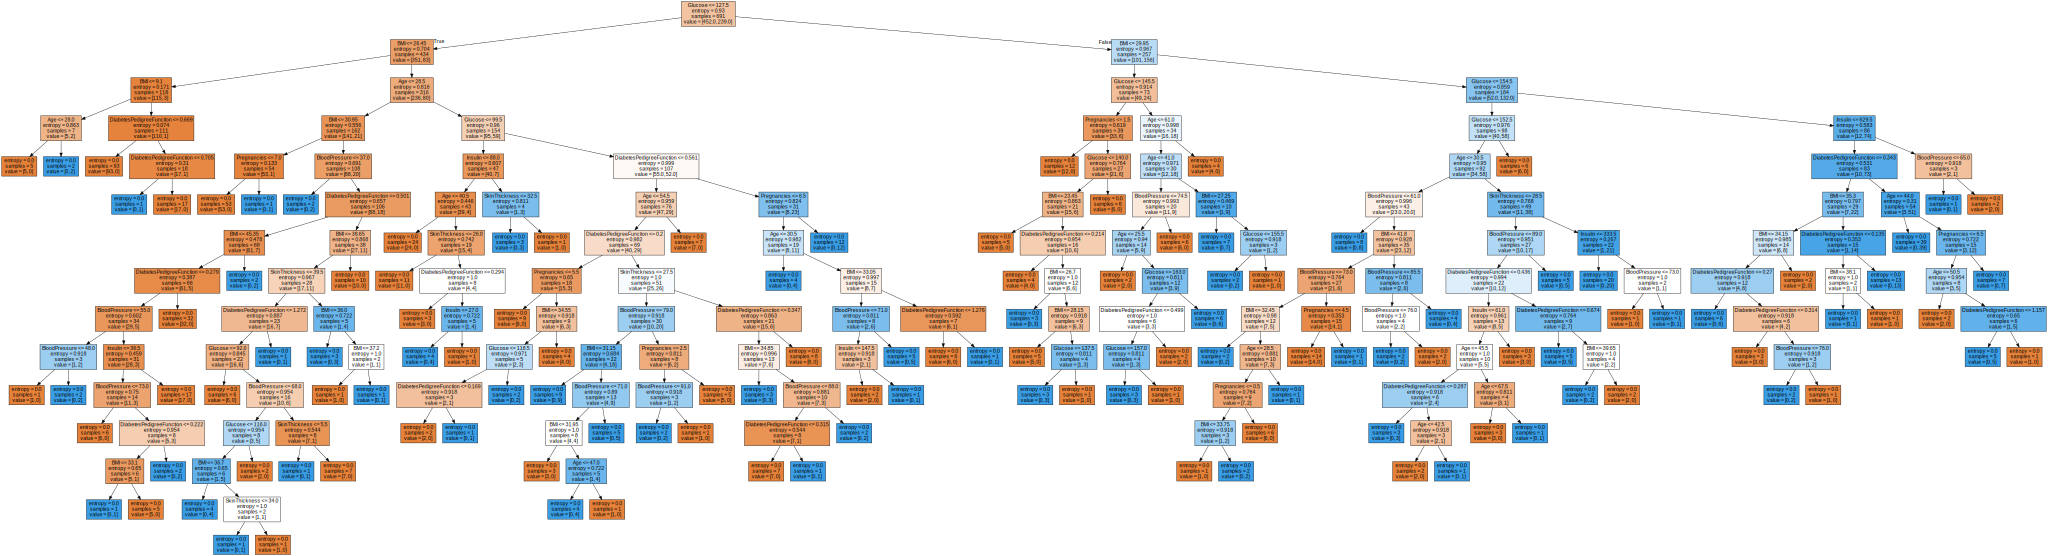

In [19]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(dc,feature_names=x.columns,filled =True))